### Importing the Necessary Packages

In [1]:
import pandas as pd
import numpy as np
import sys, os
import warnings
import logging
warnings.filterwarnings('ignore')

### Setting the Path For the Scripts

In [2]:
sys.path.append(os.path.abspath('../scripts'))

In [3]:
import preprocessing as psr
from rfms_visualization import visualize_rfms, classify_rfms, visualize_label_counts,visualize_rfm_distribution
from woe_iv_calculator import woe_binning, visualize_woe_bins, calculate_information_value, get_top_features_by_iv, plot_feature_importance
from bin_feature import bin_feature

### Loading the Datatset

In [4]:
filepath = r'C:\Users\Blen\OneDrive\Desktop\10Academy\CreditScoreModeling\data\aggregated_data.csv'

In [5]:
data = psr.load_data(filepath)

2024-10-08 19:31:55,637 - INFO - Loading the dataset....


In [6]:

data.drop(data[data['AccountId'] == 'AccountId_10'].index, inplace=True)


In [7]:
data.head()

,AccountId,total_transaction_amount,average_transaction_amount,transaction_count,transaction_std,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_Score,credit_debit_ratio,max_transaction_amount,subscription_count
0,AccountId_1,70000.0,2.333333e+04,3,5773.502692,34,3,70000.0,4,1,4,9,0.0,30000.0,1
2,AccountId_100,180000.0,9.000000e+04,2,14142.135624,37,2,180000.0,4,1,5,10,0.0,100000.0,1
3,AccountId_1000,97000.0,9.700000e+03,10,16686.987612,79,10,97000.0,5,3,4,12,0.0,50000.0,1
4,AccountId_1002,2000000.0,2.000000e+06,1,NaN,21,1,2000000.0,3,1,5,9,0.0,2000000.0,1
5,AccountId_1004,10000.0,2.000000e+03,5,0.000000,57,5,10000.0,4,2,2,8,0.0,2000.0,1


In [8]:
psr.missing_values_table(data)

2024-10-08 19:31:55,677 - INFO - Displaying Missing Value Percentages for Each Column....


The dataframe has 15columns.
There are 1 columns that have missing values.



,Missing Values,% of Total Values,DType
transaction_std,812,22.4,float64


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3632 entries, 0 to 3632
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   AccountId                   3632 non-null   object 
 1   total_transaction_amount    3632 non-null   float64
 2   average_transaction_amount  3632 non-null   float64
 3   transaction_count           3632 non-null   int64  
 4   transaction_std             2820 non-null   float64
 5   recency                     3632 non-null   int64  
 6   frequency                   3632 non-null   int64  
 7   monetary                    3632 non-null   float64
 8   recency_score               3632 non-null   int64  
 9   frequency_score             3632 non-null   int64  
 10  monetary_score              3632 non-null   int64  
 11  RFM_Score                   3632 non-null   int64  
 12  credit_debit_ratio          3632 non-null   float64
 13  max_transaction_amount      3632 non-n

### Visualize RFMS Space

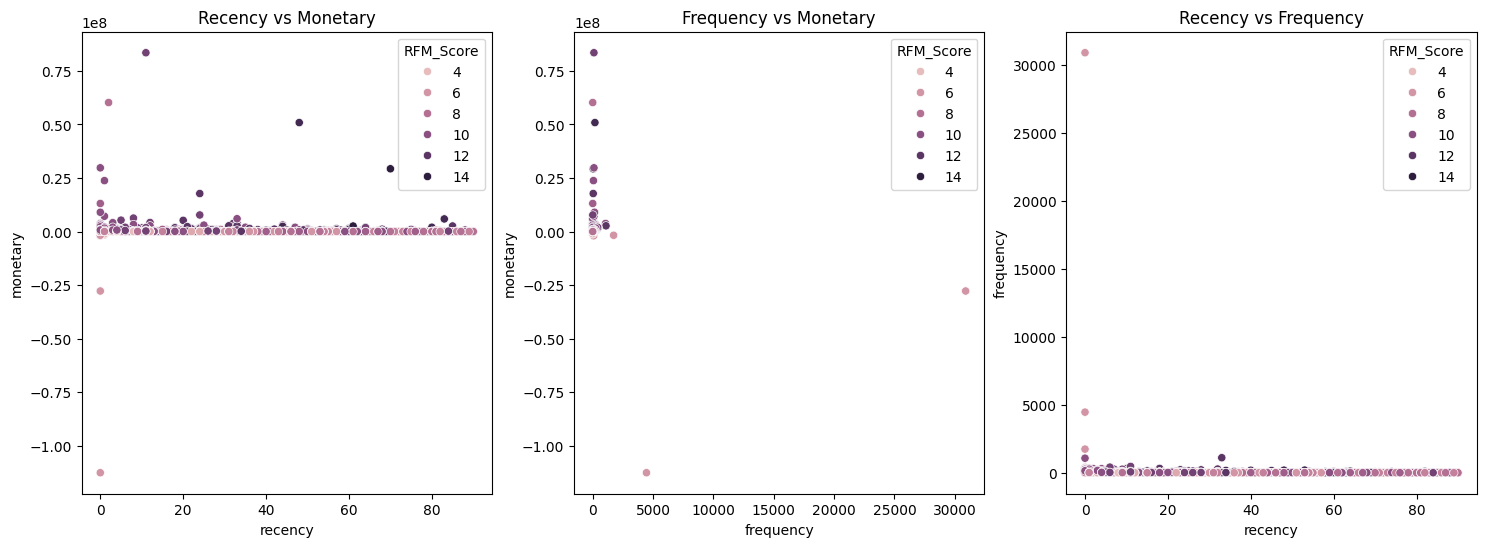

In [10]:
visualize_rfms(data)

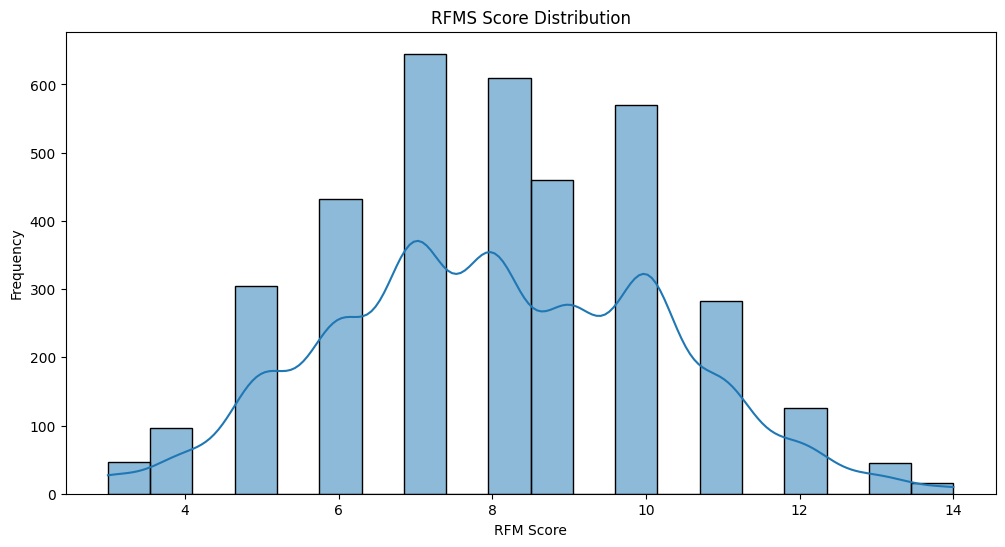

In [11]:
visualize_rfm_distribution(data)

### Classify Users

In [12]:
data = classify_rfms(data, threshold=7)

In [13]:
data.head()

,AccountId,total_transaction_amount,average_transaction_amount,transaction_count,transaction_std,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_Score,credit_debit_ratio,max_transaction_amount,subscription_count,label
0,AccountId_1,70000.0,2.333333e+04,3,5773.502692,34,3,70000.0,4,1,4,9,0.0,30000.0,1,1
2,AccountId_100,180000.0,9.000000e+04,2,14142.135624,37,2,180000.0,4,1,5,10,0.0,100000.0,1,1
3,AccountId_1000,97000.0,9.700000e+03,10,16686.987612,79,10,97000.0,5,3,4,12,0.0,50000.0,1,1
4,AccountId_1002,2000000.0,2.000000e+06,1,NaN,21,1,2000000.0,3,1,5,9,0.0,2000000.0,1,1
5,AccountId_1004,10000.0,2.000000e+03,5,0.000000,57,5,10000.0,4,2,2,8,0.0,2000.0,1,1


### Visualizing label counts

2024-10-08 19:31:56,567 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-10-08 19:31:56,579 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


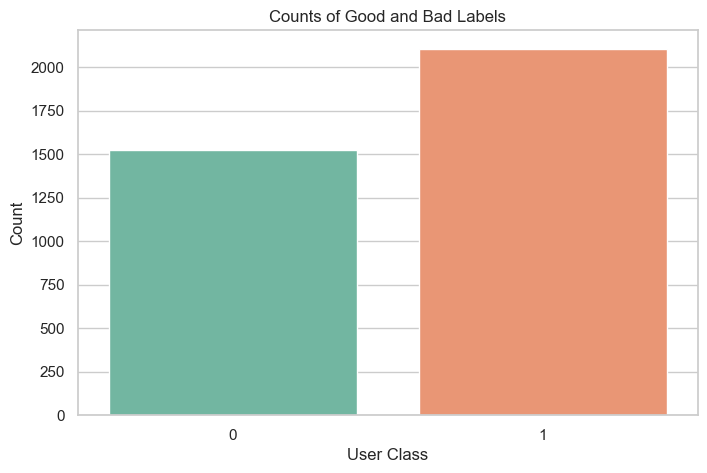

In [14]:
visualize_label_counts(data)

In [15]:
features_to_bin = ['total_transaction_amount', 'average_transaction_amount', 'transaction_count',
            'transaction_std', 'recency', 'frequency', 'monetary', 'subscription_count']

In [16]:
for feature in features_to_bin:
    if data[feature].hasnans:
        logging.info(f"Handling missing values in {feature}")
        data[feature] = data[feature].fillna(data[feature].median())

ValueError: Categorical categories cannot be null